source: 

# GCN Goal
- Learn a function of signals/features on a graph $\mathcal{G}=(\mathcal{V}, \mathcal{E})$ and classify vertices according to some node label. The function  takes as input:
 - A feature description $x_i$ for every node $i$; summarized in a $N\times D$ feature matrix $X$ ($N$: number of nodes, $D$: number of input features)
 - A representative description of the graph structure in matrix form; typically in the form of an adjacency matrix A (or some function thereof)
 
and produces a node-level output $Z$ (an $N\times F$ feature matrix, where F is the number of output features per node).

# How is it done?
- Take the input
- Sequentially process through hidden layers, which are intermediate feature representation of a neural network.
- Flatten the representations into the softmax probability distribution over labels.
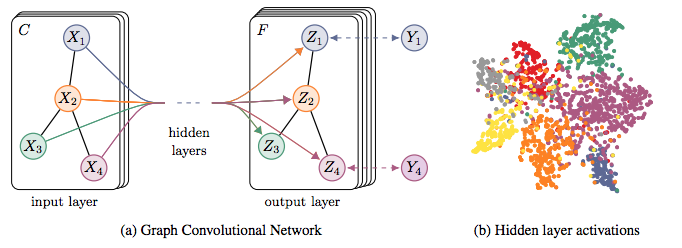

# Hidden Layers
- $H^{(l+1)}=f(H^{(l)}, A)$, where 
 - $A$ is the adjacency matrix.
 - $H^{0} = X$
 - $H^{(L)} = Z$

# Propagation Rule
- $f(H^{(l)}, A) = \sigma(AH^{(l)}W^{(l)})$, where
- $W^{(l)}$ is the weight matrix for l-th layer
- $\sigma(.)$ is an activation function such as $ReLU$

# Issues with Propagation Rule
- it taken into account features of nodes that are connected to the node that is in focus and ignores features of the node itself. This problem can be solved by adding self loop to $A$. To do that we construct $\tilde{A} = I + A$
- Nodes with high degree can change the scale off feature vector. To solve the issuer we use Normalized Laplacian.
- The new propagation rule is: 
$$
f(H^{(l)}, A) = \sigma(\tilde{D}^\frac{-1}{2}\tilde{A}\tilde{D}^\frac{-1}{2}H^{(l)}W^{(l)})
$$

# Loss
- label information is smoothed over the graph via some form of explicit graph-based regularization.
$$
\mathcal{L}=\mathcal{L_0}+\mathcal{L_{reg}}, where
$$
$$
\mathcal{L_{reg}} = \sum_{i,j}A_{ij}\|f(X_i)=f(X_j)\|^2=f(X)^T \Delta f(X)
$$
- The training is performed only on supervised loss, $\mathcal(L)_0$, the labeled part of the graph.
- $f(.)$ can be a neural network-like differantiable function.



# Hands-on Exercise

In [68]:
import networkx as nx
import random
import numpy as np
import math
import matplotlib.pyplot as plt

matrix([[0, 1, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 0, 0]], dtype=int64)

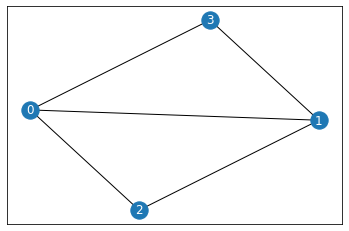

In [55]:
#defining a graph
random.seed(42)
N = 4
DROP_RATE=.25
G = nx.complete_graph(N)
G.remove_edges_from(random.sample(G.edges(),k=int(DROP_RATE*G.number_of_edges())))
nx.draw_networkx(G, with_labels=True, font_color='w')
A = nx.adj_matrix(G).todense()
A

In [56]:
#Creating attributes
X = np.matrix([[i, -i] for i in range(A.shape[0])], dtype=float)
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.]])

In [57]:
#Simple propagation rule
A * X

matrix([[ 6., -6.],
        [ 5., -5.],
        [ 1., -1.],
        [ 1., -1.]])

In [58]:
#adding self loop
I = np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [59]:
A_hat = A + I
A_hat

matrix([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 0., 1.]])

In [60]:
A_hat * X

matrix([[ 6., -6.],
        [ 6., -6.],
        [ 3., -3.],
        [ 4., -4.]])

In [61]:
# Normalizing feature representation
D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D))
D

matrix([[3, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 0, 2, 0],
        [0, 0, 0, 2]], dtype=int64)

In [62]:
# Transofrming adjacency matrix
A, D**-1 * A

(matrix([[0, 1, 1, 1],
         [1, 0, 1, 1],
         [1, 1, 0, 0],
         [1, 1, 0, 0]], dtype=int64),
 matrix([[0.        , 0.33333333, 0.33333333, 0.33333333],
         [0.33333333, 0.        , 0.33333333, 0.33333333],
         [0.5       , 0.5       , 0.        , 0.        ],
         [0.5       , 0.5       , 0.        , 0.        ]]))

In [63]:
#Applying propagation rule
D**-1 * A*X

matrix([[ 2.        , -2.        ],
        [ 1.66666667, -1.66666667],
        [ 0.5       , -0.5       ],
        [ 0.5       , -0.5       ]])

In [64]:
#Adding weights
D_hat = np.array(np.sum(A_hat, axis=0))[0]
W = np.matrix([
             [1, -1],
             [-1, 1]
         ])
D_hat**-1 * A_hat * X * W

matrix([[ 10.66666667, -10.66666667]])

In [65]:
W = np.matrix([
             [1],
             [-1]
         ])
D_hat**-1 * A_hat * X * W

matrix([[10.66666667]])